# Lets Data hit SIX

Working on different data sets to analyse and predict how cricket player will perform in a given match

### Step 1 : Data Loading and Understanding

In [366]:
import pandas as pd
import numpy as np

In [367]:
batting_data=pd.read_csv('D:\\Cricket Data Analysis\\Data\\fact_bating_summary.csv')
bowling_data=pd.read_csv('D:\\Cricket Data Analysis\\Data\\fact_bowling_summary.csv')
match_data=pd.read_csv('D:\\Cricket Data Analysis\\Data\\dim_match_summary.csv')
player_info=pd.read_csv('D:\\Cricket Data Analysis\\Data\\dim_players.csv')


In [368]:
# Batting Data
batting_data.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [369]:
batting_data.dtypes

match          object
teamInnings    object
battingPos      int64
batsmanName    object
runs            int64
balls           int64
4s              int64
6s              int64
SR             object
out/not_out    object
match_id       object
dtype: object

In [370]:
batting_data['SR']=batting_data['SR'].replace('-',0)

In [371]:
def handle(value):
    return float(value.replace('',np.NaN).strip())

In [372]:
batting_data['SR']=batting_data['SR'].astype(float)

In [373]:
batting_data.shape

(699, 11)

In [374]:
batting_data.isna().sum()

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64

In [375]:
# Bowling Data

In [376]:
bowling_data.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [377]:
bowling_data.dtypes

match           object
bowlingTeam     object
bowlerName      object
overs          float64
maiden           int64
runs             int64
wickets          int64
economy        float64
0s               int64
4s               int64
6s               int64
wides            int64
noBalls          int64
match_id        object
dtype: object

In [378]:
bowling_data.shape

(500, 14)

In [379]:
# Match Data 


In [380]:
match_data.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [381]:
match_data.dtypes

team1        object
team2        object
winner       object
margin       object
ground       object
matchDate    object
match_id     object
dtype: object

In [382]:
match_data.shape

(45, 7)

In [383]:
match_data.isna().sum()

team1        0
team2        0
winner       0
margin       4
ground       0
matchDate    0
match_id     0
dtype: int64

In [384]:
match_data['margin']=match_data['margin'].fillna('Not_Available')

In [385]:
# Player info

In [386]:
player_info.head()

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


In [387]:
player_info.drop(columns=['image'],axis=1,inplace=True)

In [388]:
player_info.columns

Index(['name', 'team', 'battingStyle', 'bowlingStyle', 'playingRole',
       'description'],
      dtype='object')

In [389]:
player_info.dtypes

name            object
team            object
battingStyle    object
bowlingStyle    object
playingRole     object
description     object
dtype: object

In [390]:
player_info.shape

(219, 6)

## Step 2: Merge Data 

In [391]:
merge_1=match_data.merge(batting_data,on='match_id')

In [392]:
merged_data=merge_1.merge(bowling_data,on='match_id')

In [393]:
merged_data.head()

,team1,team2,winner,margin,ground,matchDate,match_id,match_x,teamInnings,battingPos,...,overs,maiden,runs_y,wickets,economy,0s,4s_y,6s_y,wides,noBalls
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,...,4.0,0,23,1,5.75,7,0,0,2,0
1,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,...,4.0,0,39,1,9.75,6,3,1,2,0
2,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,...,4.0,0,37,2,9.25,6,3,1,0,0
3,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,...,4.0,0,36,1,9.00,7,3,1,1,0
4,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,...,4.0,0,27,1,6.75,8,1,1,0,0


In [394]:
merged_data.shape

(8348, 30)

## Exploratory Data Analysis

In [395]:
match_data=match_data.merge(batting_data,on='match_id')

In [396]:
match_data.head()

,team1,team2,winner,margin,ground,matchDate,match_id,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out


In [397]:
match_data.rename(columns={'team1':'TeamA','team2':'TeamB','winner':'Winner','margin':'Won_by','ground':'Location','matchDate':'Match_Date','match_id':'Match_id','match':'Match','teamInnings':'Playing','battingPos':'Batting_Position','runs':'Runs'},inplace=True)

In [398]:
# Lets plot a histplot how many players scored how much runs 
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Frequency')

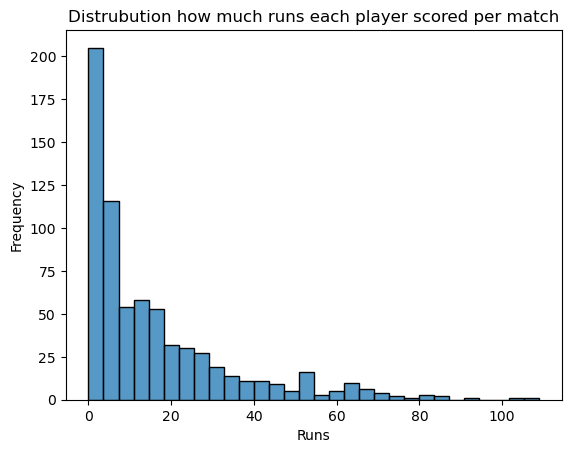

In [399]:
sns.histplot(match_data['Runs'],bins=30)
plt.title('Distrubution how much runs each player scored per match')
plt.xlabel('Runs')
plt.ylabel('Frequency')

In [400]:
# This shows that a lot of batsman failed to perform well only a few number of batsman score above 40 
# Top Scorers
top_scrores=match_data.sort_values(by='Runs',ascending=False)

In [401]:
top_run_scores=top_scrores.head(10)

In [402]:
# Most Consistent
consistent=match_data[(match_data['Batting_Position'] < 5) & (match_data['balls'] > 10)]
consistent=consistent.groupby('batsmanName')['SR'].mean().reset_index().sort_values(by='SR',ascending=False)

In [403]:
consistent_players=consistent['batsmanName'].to_list()

In [404]:
print(f'Top Batsman with consitent strike for T20 World Cup are ')
for i,player in enumerate(consistent_players[0:10]):
    print(f'{i+1}){player}')

Top Batsman with consitent strike for T20 World Cup are 
1)Suryakumar Yadav
2)Finn Allen
3)Quinton de Kock
4)Gulbadin Naib
5)Glenn Phillips
6)Jan Nicol Loftie-Eaton
7)Glenn Maxwell
8)Rilee Rossouw
9)Mohammad Haris
10)Iftikhar Ahmed


Text(0.5, 1.0, 'Top 3 batsman of 2020 T20I World Cup')

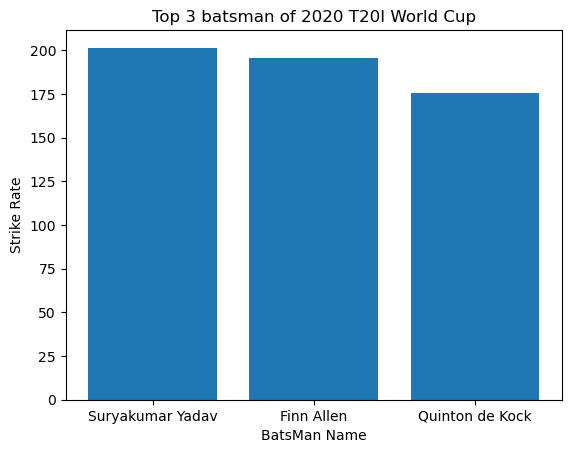

In [405]:
plt.bar(consistent_players[0:3],consistent['SR'][0:3])
plt.xlabel('BatsMan Name')
plt.ylabel('Strike Rate')
plt.title('Top 3 batsman of 2020 T20I World Cup')


In [406]:
# Most wins by
winners=match_data.groupby('Match')['Winner'].value_counts().reset_index()

In [407]:
winners.drop(columns='count',inplace=True)

In [408]:
new_=winners['Winner'].value_counts().reset_index()

In [409]:
new_.sort_values(by='count',ascending=False,inplace=True)

Text(0.5, 1.0, 'Team with most wins')

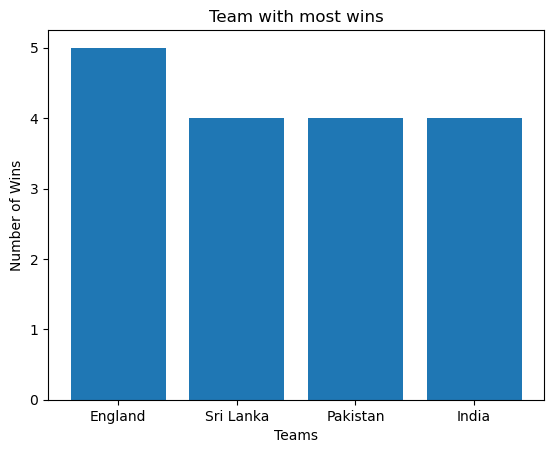

In [410]:
plt.bar(list(new_['Winner'].unique()[0:4]),new_['count'][0:4])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Team with most wins')


In [411]:
# England Pakistan SriLanka and India appears to be stronger team to win
location=match_data.groupby('Location')['Runs'].sum().reset_index()

In [412]:
innings_played_stadium=[]
for loca in location['Location'].to_list() :
 innings_played_stadium.append(len(match_data[match_data['Location']==loca]['Match_id'].unique()))

In [413]:
avg_score_at_pitches=[(x/y)//2 for x,y in zip(location['Runs'].to_list(),innings_played_stadium) ]

In [414]:
avg_score_at_pitches

[145.0, 146.0, 122.0, 127.0, 133.0, 115.0, 141.0]

In [415]:
avg_scores={} 
for x,y in zip(location['Location'].to_list(),avg_score_at_pitches):
  avg_scores[x]=y

In [416]:
for key,value in avg_scores.items():
    print(f'Average Score of First Innings at {key} is {value}')

Average Score of First Innings at Adelaide is 145.0
Average Score of First Innings at Brisbane is 146.0
Average Score of First Innings at Geelong is 122.0
Average Score of First Innings at Hobart is 127.0
Average Score of First Innings at Melbourne is 133.0
Average Score of First Innings at Perth is 115.0
Average Score of First Innings at Sydney is 141.0


Text(0, 0.5, 'Score')

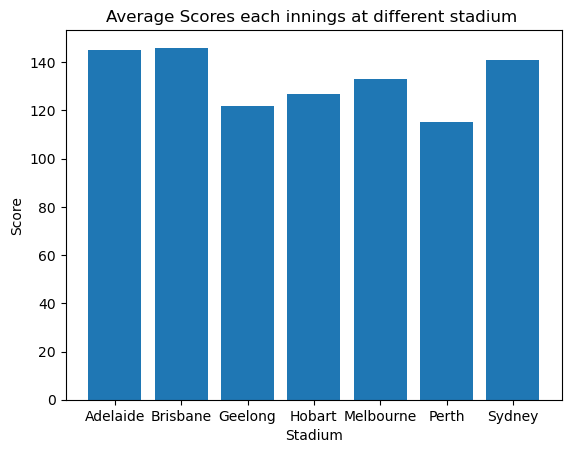

In [417]:
plt.bar(location['Location'].to_list(),avg_score_at_pitches)
plt.title('Average Scores each innings at different stadium ')
plt.xlabel('Stadium')
plt.ylabel('Score')

In [418]:
# Oppositon
teams=list(match_data['Playing'].unique())

In [419]:
match_data_1=pd.read_csv('D:\\Cricket Data Analysis\\Data\\dim_match_summary.csv')

In [420]:
# Now for bowlers
bowling_data=bowling_data.merge(match_data_1,on='match_id')

Text(0, 0.5, 'Frequency')

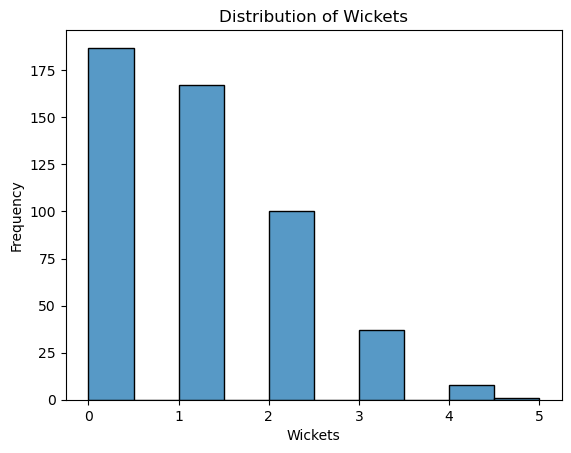

In [421]:
sns.histplot(bowling_data['wickets'])
plt.title('Distribution of Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')

In [422]:
# This graph indicates most of the bowlers failed to take wickets around 175+ meanwhile no bowler took 5 wickets 

In [423]:
# most wickets by bowler
most_wickets=bowling_data.groupby('bowlerName')['wickets'].sum().reset_index()

In [424]:
sorted_=most_wickets.sort_values(by='wickets',ascending=False)

In [425]:
# Top 10 bowler with most wickets are 
print('Top 10 bowlers with most wicket')
for i,name in enumerate(sorted_['bowlerName'].to_list()[0:10]):
    print(f'{i+1}){name}')

Top 10 bowlers with most wicket
1)Wanindu Hasaranga de Silva
2)Bas de Leede
3)Sam Curran
4)Blessing Muzarabani
5)Paul van Meekeren
6)Josh Little
7)Shadab Khan
8)Shaheen Shah Afridi
9)Anrich Nortje
10)Sikandar Raza


Text(0.5, 1.0, 'Top 3 wicket taking bowlers in t20 world cup 2022')

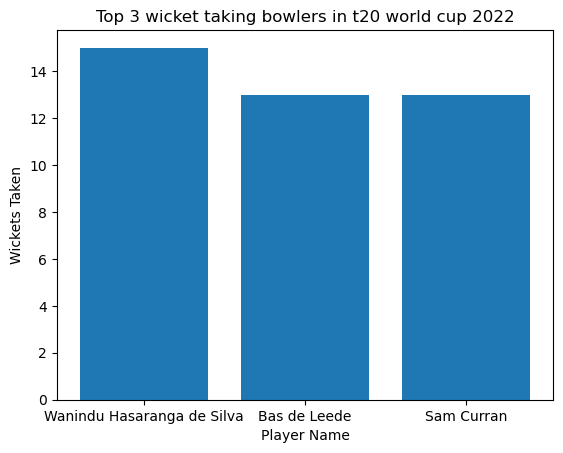

In [426]:
plt.bar(sorted_['bowlerName'][0:3],sorted_['wickets'][0:3])
plt.xlabel('Player Name')
plt.ylabel('Wickets Taken')
plt.title('Top 3 wicket taking bowlers in t20 world cup 2022')

In [427]:
# Average bowling economy of each team 
bowling_economy=bowling_data.groupby('bowlingTeam')['economy'].mean().reset_index()

In [428]:
# Most wicket taking team 
bowling_wickets=bowling_data.groupby('bowlingTeam')['wickets'].sum().reset_index()


In [429]:
# Lets see average runs scored by each team 
average_run=match_data.groupby('Playing')['Runs'].sum().reset_index()

In [430]:
# Matches Played by each team 
matches_played=match_data.groupby('Match_id')['TeamA'].value_counts().reset_index()

In [431]:
nd_=matches_played['TeamA'].value_counts().reset_index()

In [432]:
# Matches Played by each team 
matches_played_B=match_data.groupby('Match_id')['TeamB'].value_counts().reset_index()

In [433]:
matches_played_B.rename(columns={'TeamB':'TeamA'},inplace=True)

In [434]:
nd_1=matches_played_B['TeamA'].value_counts().reset_index()

In [435]:
matches_play=nd_.merge(nd_1,on='TeamA',how='outer')

In [436]:
matches_play.replace(np.NaN,float(0),inplace=True)

In [437]:
matches_play['Match Played']=matches_play['count_x']+matches_play['count_y']

In [438]:
matches_play.drop(columns=['count_x','count_y'],inplace=True)

In [439]:
def handles(value):
    return int(value)

In [440]:
matches_play['Match Played']=matches_play['Match Played'].apply(handles)

In [441]:
matches_play.rename(columns={'TeamA':'Teams'},inplace=True)

In [442]:
average_run.rename(columns={'Playing':'Teams'},inplace=True)

In [443]:
strong=average_run.merge(matches_play,on='Teams')

In [444]:
strong['Average Score Per Innings']=strong['Runs']//strong['Match Played']

In [445]:
bowling_wickets.rename(columns={'bowlingTeam':'Teams'},inplace=True)

In [446]:
team=strong.merge(bowling_wickets,on='Teams')

In [447]:
bowling_economy.rename(columns={'bowlingTeam':'Teams'},inplace=True)

In [448]:
team=team.merge(bowling_economy,on='Teams')

In [449]:
team['Economy']=round(team['economy'],2)

In [450]:
team.drop(columns=['economy'],inplace=True)

In [451]:
new_.rename(columns={'Winner':'Teams'},inplace=True)

In [452]:
team=team.merge(new_,on='Teams',how='outer')

In [453]:
team.rename(columns={'count':'Wins'},inplace=True)

In [454]:
team['Wins']=team['Wins'].fillna(float(0))

In [455]:
team.dropna(inplace=True)

In [456]:
team

,Teams,Runs,Match Played,Average Score Per Innings,wickets,Economy,Wins
0,Afghanistan,399.0,3.0,133.0,16.0,8.30,0.0
1,Australia,577.0,4.0,144.0,22.0,8.28,3.0
2,Bangladesh,629.0,5.0,125.0,29.0,8.29,2.0
3,England,798.0,6.0,133.0,45.0,7.44,5.0
4,India,966.0,6.0,161.0,37.0,8.05,4.0
5,Ireland,989.0,7.0,141.0,33.0,8.40,3.0
6,Namibia,398.0,3.0,132.0,16.0,7.13,1.0
7,Netherlands,957.0,8.0,119.0,50.0,6.93,4.0
8,New Zealand,820.0,5.0,164.0,37.0,7.02,3.0
9,Pakistan,928.0,7.0,132.0,45.0,6.72,4.0


In [457]:
team=team.sort_values(by=['Average Score Per Innings','wickets'],ascending=False).reset_index()

In [458]:
team.drop(columns=['index'],inplace=True)

Text(0.5, 1.0, 'Team with top average score per innings')

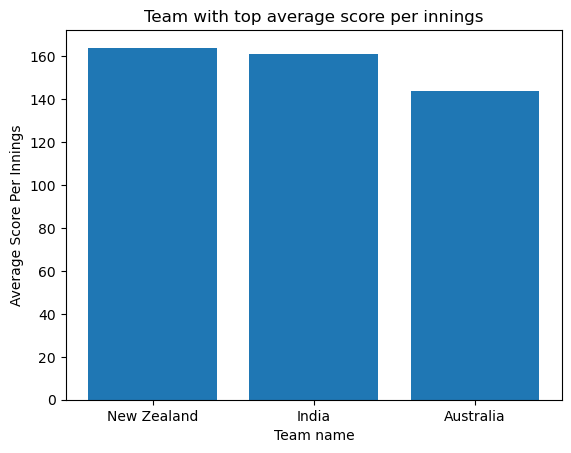

In [459]:
# Top 3 player with average innings per score
plt.bar(team['Teams'][0:3].to_list(),team['Average Score Per Innings'][0:3].to_list())
plt.xlabel('Team name')
plt.ylabel('Average Score Per Innings')
plt.title('Team with top average score per innings')

Text(0.5, 1.0, 'Team with Good Economy')

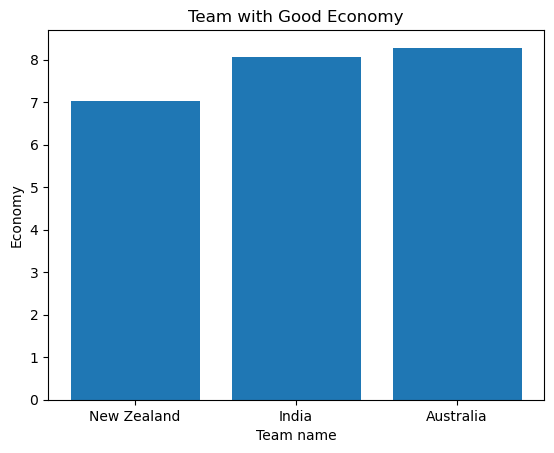

In [460]:
plt.bar(team['Teams'][0:3].to_list(),team['Economy'][0:3].to_list())
plt.xlabel('Team name')
plt.ylabel('Economy')
plt.title('Team with Good Economy')

## Feature Engineering

In [461]:
# Lets predict player would score in a match 
batting=pd.read_csv('D:\\Cricket Data Analysis\\Data\\fact_bating_summary.csv')

In [462]:
batting=batting[batting['battingPos']<8]

In [463]:
batting['SR']=batting['SR'].replace('-',0)

In [464]:
batting['SR']=batting['SR'].astype(float)

In [465]:
batting.select_dtypes(include=['int64','float64']).corr()

,battingPos,runs,balls,4s,6s,SR
battingPos,1.000000,-0.237044,-0.283933,-0.262746,-0.164082,-0.067815
runs,-0.237044,1.000000,0.931387,0.858394,0.740670,0.621806
balls,-0.283933,0.931387,1.000000,0.770845,0.572323,0.440323
4s,-0.262746,0.858394,0.770845,1.000000,0.474652,0.584112
6s,-0.164082,0.740670,0.572323,0.474652,1.000000,0.549599
SR,-0.067815,0.621806,0.440323,0.584112,0.549599,1.000000


In [466]:
batting.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'runs', 'balls',
       '4s', '6s', 'SR', 'out/not_out', 'match_id'],
      dtype='object')

In [467]:
batting=batting.groupby('batsmanName')[['runs','4s','6s']].sum().reset_index()

In [468]:
batting.head()

,batsmanName,runs,4s,6s
0,Aaron Finch(c),107,6,5
1,Aayan Afzal Khan,19,1,0
2,Afif Hossain,95,6,3
3,Aiden Markram,99,13,1
4,Alex Hales,212,19,10


In [469]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [470]:
xtrain,xtest,ytrain,ytest=train_test_split(batting[['4s','6s']],batting['runs'],test_size=0.2,random_state=42)

In [471]:
lr=LinearRegression()


In [472]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [473]:
lr.coef_

array([7.63278557, 7.38717592])

In [474]:
lr.intercept_

10.273178829628925

In [475]:
yhat=lr.predict(xtest)

Text(0.5, 1.0, 'Comparision Between actual Values and Predicted values')

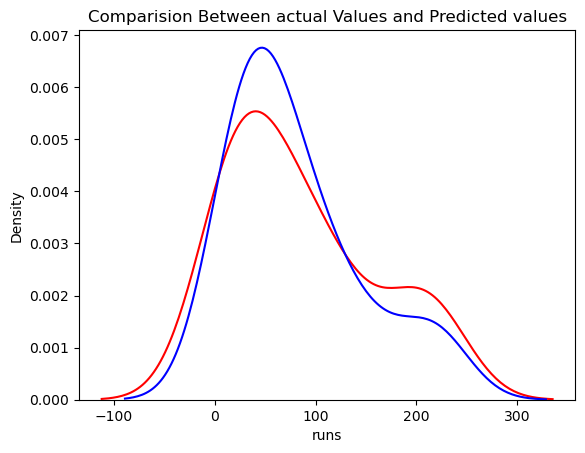

In [476]:
sns.kdeplot(ytest,color='r')
sns.kdeplot(yhat,color='b')
plt.title('Comparision Between actual Values and Predicted values')

In [477]:
lr.score(xtrain,ytrain)

0.9296675244937258

In [478]:
lr.score(xtest,ytest)

0.9201020081815687

In [479]:
from sklearn.model_selection import cross_val_score
rcross=cross_val_score(lr,batting[['4s','6s']],batting['runs'],cv=4)

In [480]:
rcross

array([0.90280825, 0.91776875, 0.94283452, 0.93326342])

In [481]:
alpha=[{'alpha':[0.1,1,10,1000]}]


In [482]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [483]:
grid=GridSearchCV(Ridge(),param_grid=alpha)

In [484]:
scaler=StandardScaler()

In [485]:
grid.fit(scaler.fit_transform(xtrain),ytrain)

GridSearchCV(estimator=Ridge(), param_grid=[{'alpha': [0.1, 1, 10, 1000]}])

In [486]:
grid.best_params_

{'alpha': 1}

In [487]:
grid.best_score_

0.9135169194793381

In [488]:
grid.best_estimator_

Ridge(alpha=1)

In [494]:
predict=grid.predict(scaler.fit_transform(xtest))

In [489]:
grid.score(scaler.fit_transform(xtest),ytest)

0.8898301373509437

## Compare Models

In [490]:
from sklearn.metrics import mean_squared_error

In [504]:
# For regression Model 
print(f'MSE : {round(mean_squared_error(yhat,ytest),2)} , R2 value : {round(lr.score(xtest,ytest),2)}')

MSE : 407.7 , R2 value : 0.92


In [505]:
# For Ridge Model
print(f'MSE : {round(mean_squared_error(ytest,predict),2)} , R2 value : {round(grid.score(scaler.fit_transform(xtest),ytest),2)}')

MSE : 562.17 , R2 value : 0.89
